# Lodestone Data Visualization Analyst Assesment
**Vidhi Gandhi**

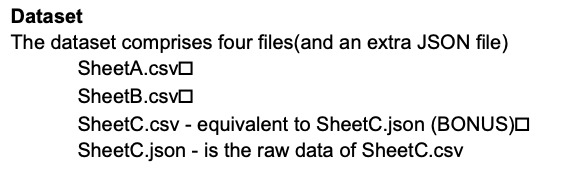

In [ ]:
#import dsutils
import io
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.colors as mcolors
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
sns.set(rc={'figure.figsize':(16,8.27)})

In [ ]:
manufacturer = pd.read_csv("SheetA.csv")

In [ ]:
user = pd.read_csv("SheetB.csv")

In [ ]:
manufacturer.head()

,grill_type,pre_heat_time,fuel_cost_per_meal,market_share,easiness_to_use,life_span_year,initial_investment
0,Charcoal,1200,2.00,0.44,-1,3,91
1,Propane,480,1.55,0.64,2,3,139


In [ ]:
user.head()

,item_material,device_id,grill_type,user_satisfaction,fuel_cost
0,Ground Beef Patty,1,Charcoal,-0.9,400.500
1,Ground Beef Patty,3,Charcoal,-1.3,399.600
2,Ground Beef Patty,5,Charcoal,-2.5,389.730
3,Ground Beef Patty,7,Charcoal,-1.7,402.399
4,Hotdog,1,Charcoal,-1.3,372.445


Q2. Which grill type is more fuel efficient based on sheet A?

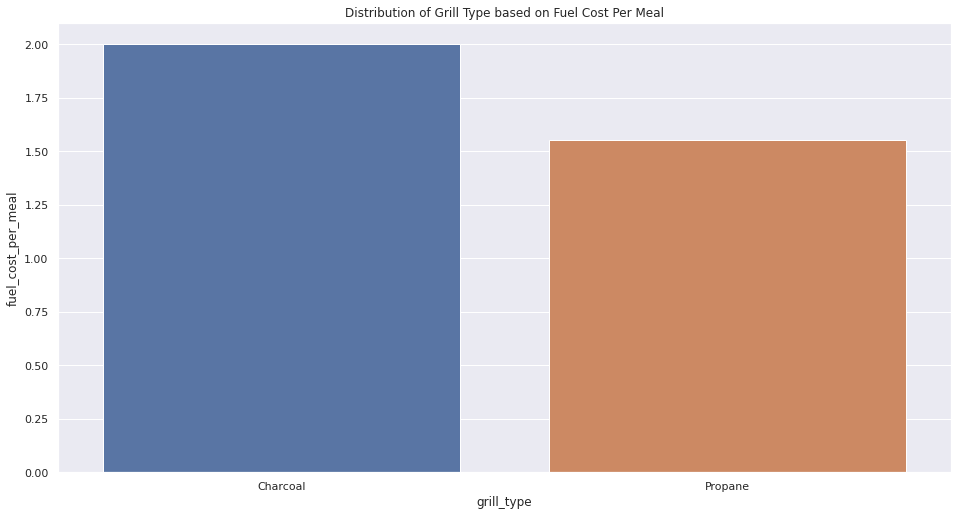

In [ ]:
sns.barplot(data=manufacturer,x='grill_type',y='fuel_cost_per_meal').set_title("Distribution of Grill Type based on Fuel Cost Per Meal");

As seen from the above plot, **Propane is more fuel efficient as compared to Charcoal**.


Q3. Which grill type has more market share?

In [ ]:
import plotly.express as px
fig= px.bar(manufacturer,x='grill_type',y='market_share',color='grill_type')
fig.show()

As seen from the plot above, **Propane has more market share than charcoal.**




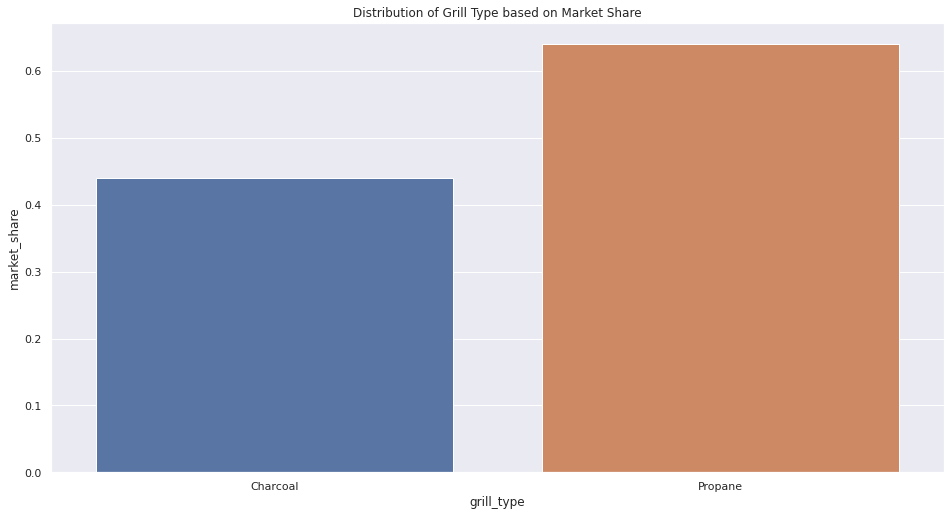

In [ ]:
sns.barplot(data=manufacturer,x='grill_type',y='market_share').set_title("Distribution of Grill Type based on Market Share");

In [ ]:
user.groupby('grill_type')[['user_satisfaction','fuel_cost']].mean().reset_index()


,grill_type,user_satisfaction,fuel_cost
0,Charcoal,-1.483333,380.890083
1,Propane,1.750000,158.108333


Q4. Based on the cookoff data which grill type cost more fuel on a long run?

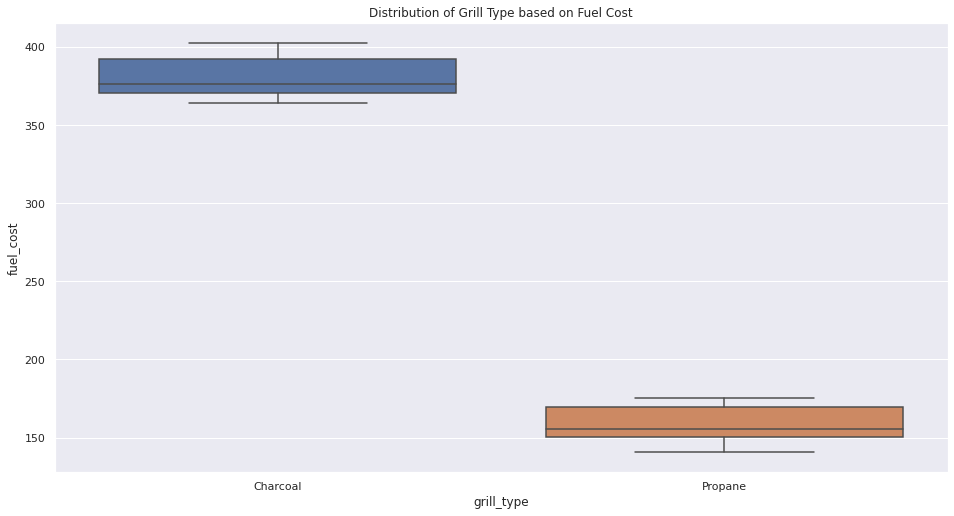

In [ ]:
sns.boxplot(x=user['grill_type'],y=user['fuel_cost']).set_title("Distribution of Grill Type based on Fuel Cost");

As seen from the above plot, for charcoal, minimum fuel cost price is around 360 and maximum is around 400. Median value for fuel cost for Charcoal is around 375. 
On the other hand, for Propane, minimum fuel cost is around 140 and maximum is around 175. The median fuel cost for propane is around 155.

Based on both the analysis, **Charcoal cost more than Propane in the long run**.

Q5. Considering that the average American grill owner buys a new grill every three years, which grill type
would cost more based on the fuel cost and initial investment?

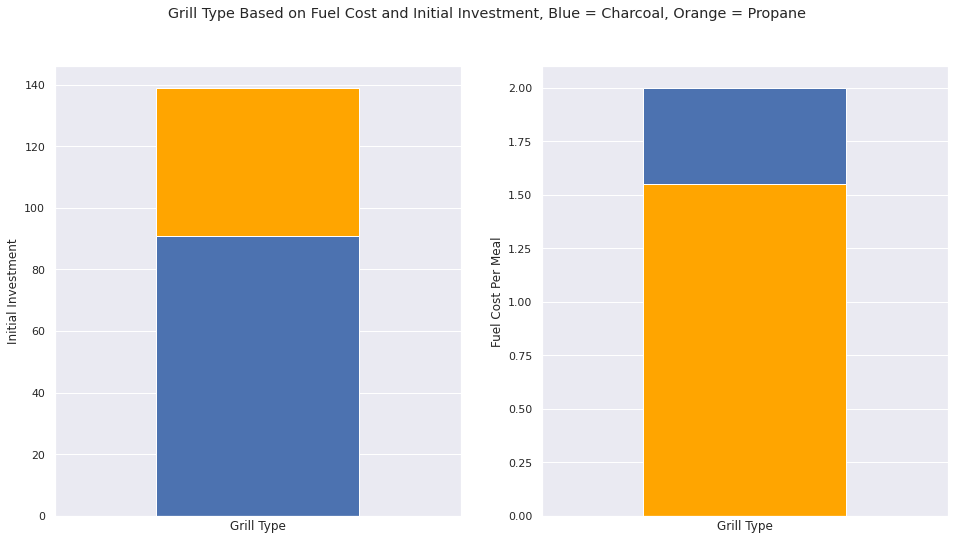

In [ ]:
fig, ax = plt.subplots(2)
plt.subplot(1, 2, 1)
manufacturer[manufacturer.grill_type=='Propane'].initial_investment.plot(kind='bar',color='orange')
manufacturer[manufacturer.grill_type=='Charcoal'].initial_investment.plot(kind='bar')
plt.xticks([])
plt.xlabel('Grill Type');
plt.ylabel('Initial Investment');
plt.subplot(1, 2, 2)
manufacturer[manufacturer.grill_type=='Charcoal'].fuel_cost_per_meal.plot(kind='bar')
manufacturer[manufacturer.grill_type=='Propane'].fuel_cost_per_meal.plot(kind='bar',color='orange')
plt.xlabel('Grill Type');
plt.xticks([])
plt.ylabel('Fuel Cost Per Meal');
plt.suptitle("Grill Type Based on Fuel Cost and Initial Investment, Blue = Charcoal, Orange = Propane");


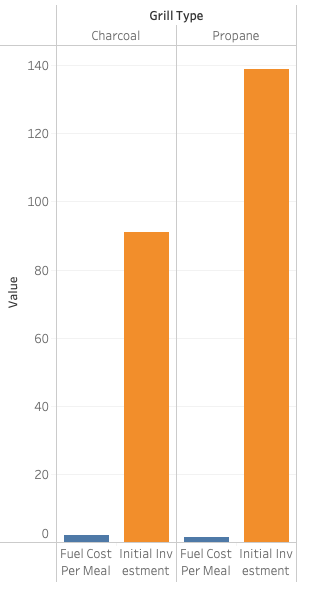

Based on the above plots, we note that, for Propane, fuel cost per meal is less but inital investment is high. On the other hand, for Charcoal, fuel cost per meal is high but inital investment is low.

Q6. Which grill type is easier to use based on the user satisfaction score?Based on data, which grill is
preferred? What factors might play a role?

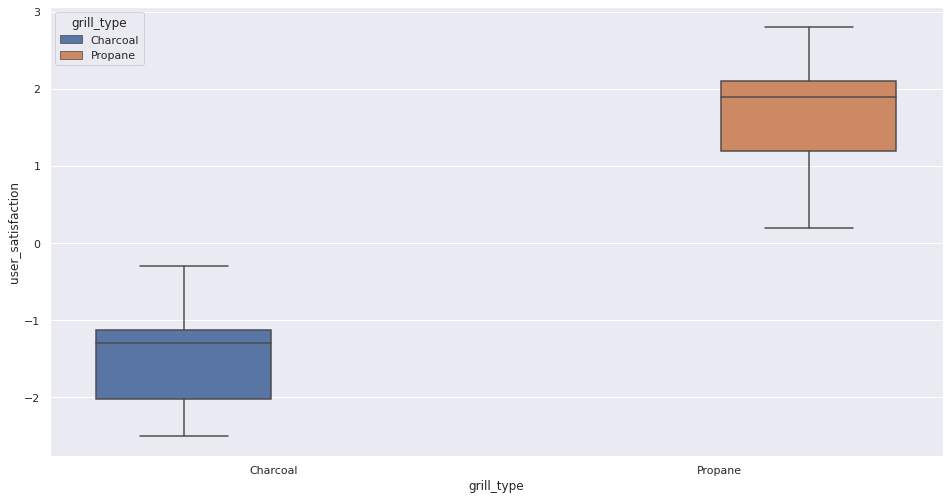

In [ ]:
sns.boxplot(y=user.user_satisfaction,x=user['grill_type'], hue=user['grill_type']);

As we see from the above plot, the user satisfaction score for Propane is way higher than that of Charcoal. 

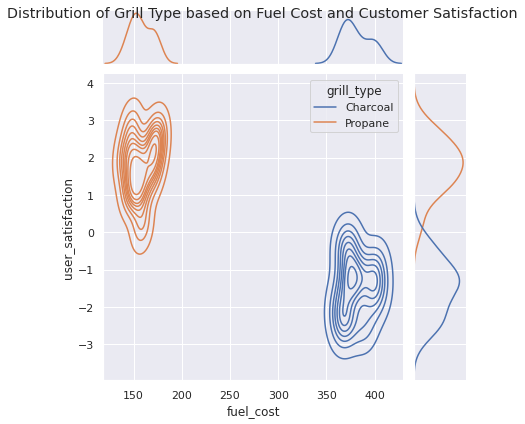

In [ ]:
sns.jointplot(x = "fuel_cost", y="user_satisfaction",hue='grill_type', data=user, kind = 'kde');
plt.suptitle("Distribution of Grill Type based on Fuel Cost and Customer Satisfaction");


We notice that as the fuel cost increases, customer satisfaction decreases.

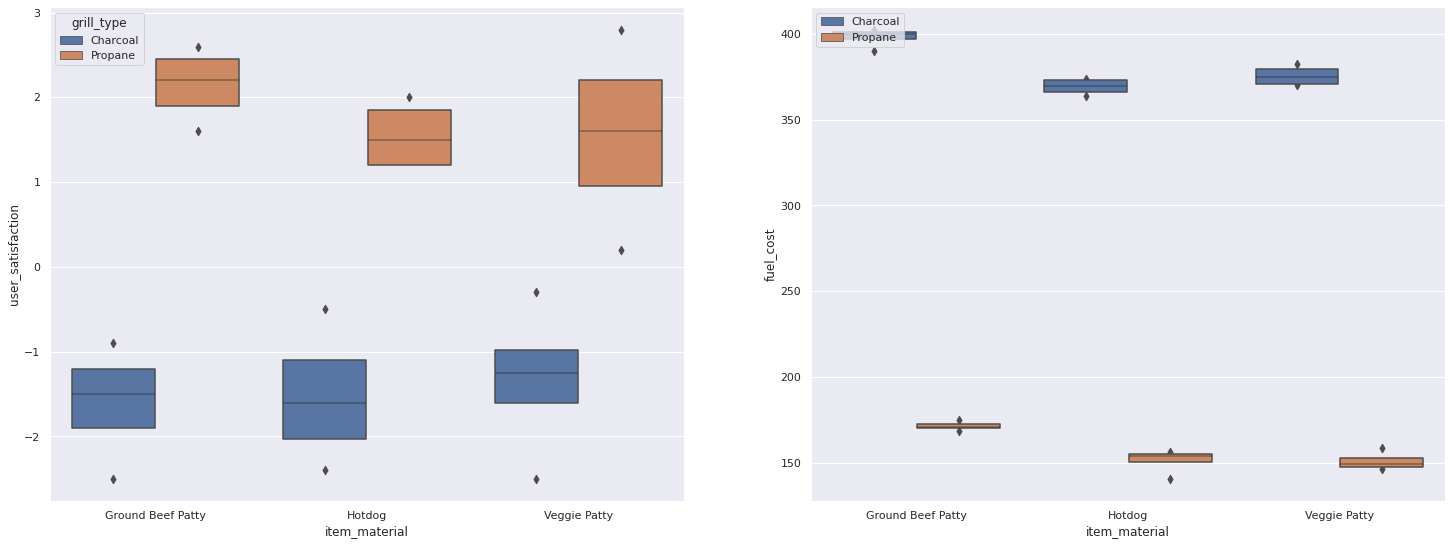

In [ ]:
fig = plt.figure(figsize = (25,20));
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
sns.boxenplot(user['item_material'],user['user_satisfaction'],hue=user['grill_type'],ax=ax1);
sns.boxenplot(user['item_material'],user['fuel_cost'],hue=user['grill_type'],ax=ax2);
plt.legend(loc='upper left');

In the above plot, we are checking for each type of item material for each type of grill type what is the user satisfaction score and fuel cost. We note that Propane has high user satisfaction score irrespective of item material. Ground Beef Patty using Propane has highest user satisfaction score.
When comparing fuel cost, charcoal is way higher than propane. 


Depending on all the comparisons, I conclude that **Propane is a more preferred grill type than charcoal.**


*   Propane has lower fuel cost.
*   Propane has higher user satisfaction score.
*   Propane has more market share.
* Propane is more fuel efficient.
*   Propane has higher inital investment.







In [ ]:
df3 = pd.merge(user,manufacturer, on = 'grill_type')

In [ ]:
df3 = df3.drop_duplicates()

In [ ]:
df3.columns

Index(['item_material', 'device_id', 'grill_type', 'user_satisfaction', 'fuel_cost', 'pre_heat_time', 'fuel_cost_per_meal', 'market_share', 'easiness_to_use', 'life_span_year', 'initial_investment'], dtype='object')

In [ ]:
df3.groupby(['grill_type','item_material'])[[ 'device_id', 'user_satisfaction', 'fuel_cost', \
                           'pre_heat_time', 'fuel_cost_per_meal',\
                           'market_share', 'easiness_to_use', 'life_span_year', 'initial_investment']].max()

device_id  user_satisfaction  fuel_cost  pre_heat_time  fuel_cost_per_meal  market_share  easiness_to_use  life_span_year  initial_investment
grill_type item_material                                                                                                                                                   
Charcoal   Ground Beef Patty          7               -0.9    402.399           1200                2.00          0.44               -1               3                  91
           Hotdog                     7               -0.5    373.725           1200                2.00          0.44               -1               3                  91
           Veggie Patty               7               -0.3    382.218           1200                2.00          0.44               -1               3                  91
Propane    Ground Beef Patty          8                2.6    175.200            480                1.55          0.64                2               3                 139
           Hotdog                     8                2.0    156.550            480                1.55          0.64                2               3                 139
           Veggie Patty               8                2.8    158.775            480                1.55          0.64                2               3                 139

Q8. Are your recommendations to the manufacturer different to recommendations you’d make to the
user?

**Answer:** There is still a big user base for charcoal even though the difference in user satisfaction score and fuel cost. The difference mainly lies in the flavour aspect. That is the main reason which is keeping users interested in charcoal grills. The user base for both these grill types mainly changes depending on the item material. Users prefer certain grill types for certain item material.
Manufacturer: Propane even though has higher initial investment, has lower fuel cost, which helps in durability for longer time. If the user base includes people who cook more than 16 times, Propane is definitely going to be the preferred product. So they should market their product in such a way.
User: If preferred item material is veggie patty, then Charcoal grill is the certain choice. In the rest of the  cases, propane grills are the preferred choice.


In [ ]:
import json
import csv
from pprint import pprint

# we are using pprint for making the output more readable.
with open('SheetC.json') as f:
    data = json.load(f)
    pprint(data)

[{'test_result': '{"1":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item_material":"Hotdog"},"sample_item_index":1,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.4"}},"10":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":10,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"1.0"}},"100":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":10,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.0"}},"101":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item_material":"Hotdog"},"sample_item_index":11,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.0"}},"102":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":12,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.4"}},"103":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item

In [ ]:
import pandas as pd
import json

with open('SheetC.json') as f:
    data = json.load(f)

In [ ]:
from pandas.io.json import json_normalize
df = json_normalize(data)
print(df)

                                         test_result
0  {"1":{"meta_data":{"grill_type":"Propane","is_...


In [ ]:
import pandas as pd

with open('SheetC.json', encoding='utf-8-sig') as f_input:
    df = pd.read_json(f_input)

df1 = pd.DataFrame(df['test_result'])


In [ ]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df

#load json object
with open('SheetC.json') as f:
    d = json.load(f)

In [ ]:
d

[{'test_result': '{"1":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item_material":"Hotdog"},"sample_item_index":1,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.4"}},"10":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":10,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"1.0"}},"100":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":10,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.0"}},"101":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item_material":"Hotdog"},"sample_item_index":11,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.0"}},"102":{"meta_data":{"grill_type":"Propane","is_frozen":"true","item_material":"Hotdog"},"sample_item_index":12,"survey_result":{"guess_grill_correct":"true","thumbs_up_score":"0.4"}},"103":{"meta_data":{"grill_type":"Propane","is_frozen":"false","item

In [ ]:
FIELDS = ["meta_data.sample_item_index",\
          "meta_data.item_material", "meta_data.is_frozen",\
          "meta_data.grill_type", "meta_data.thumbs_up_score",
          "meta_data.guess_grill_correct"]
df = pd.json_normalize(d, record_path="test_result",sep = "-")
df[FIELDS]

TypeError: ignored

In [ ]:
import sys
import json
import csv
import io

##
# Convert to string keeping encoding in mind...
##
def to_string(s):
    try:
        return str(s)
    except:
        #Change the encoding type if needed
        return s.encode('utf-8')

def reduce_item(key, value):
    global reduced_item
    
    #Reduction Condition 1
    if type(value) is list:
        i=0
        for sub_item in value:
            reduce_item(key+'_'+to_string(i), sub_item)
            i=i+1

    #Reduction Condition 2
    elif type(value) is dict:
        sub_keys = value.keys()
        for sub_key in sub_keys:
            reduce_item(key+'_'+to_string(sub_key), value[sub_key])
    
    #Base Condition
    else:
        reduced_item[to_string(key)] = to_string(value)




In [ ]:
with io.open("SheetC.json", 'r', encoding='utf-8-sig') as fp:
            json_value = fp.read()
            raw_data = json.loads(json_value)
try:
  data_to_be_processed = raw_data[0]
except:
  data_to_be_processed = raw_data

processed_data = []
header = []
for item in data_to_be_processed:
  reduced_item = {}
  reduce_item(raw_data[0], item)
  header += reduced_item.keys()
  processed_data.append(reduced_item)
  header = list(set(header))
  header.sort()

with open("output.csv", 'w+') as f:
  writer = csv.DictWriter(f, header, quoting=csv.QUOTE_ALL)
  writer.writeheader()
  for row in processed_data:
    writer.writerow(row)

print ("Just completed writing csv file with %d columns" % len(header))
